In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
# Load the Fashion MNIST dataset and preprocess it
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0  # Reshape and normalize training data
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0  # Reshape and normalize test data

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Define the CNN model
model = Sequential()

In [ ]:
# Add the first convolutional layer with 32 filters, a 3x3 kernel, and ReLU activation
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Add max-pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a second convolutional layer with 64 filters, a 3x3 kernel, and ReLU activation
model.add(Conv2D(64, (3, 3), activation='relu'))
# Add max-pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Flatten the output of the convolutional layers
model.add(Flatten())
# Add a fully connected layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))
# Add the output layer with 10 units (one for each class) and softmax activation
model.add(Dense(10, activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the model and store the training history
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 45s 59ms/step - loss: 0.2746 - accuracy: 0.8991 - val_loss: 0.2925 - val_accuracy: 0.8950
Epoch 2/5
750/750 [==============================] - 41s 55ms/step - loss: 0.2393 - accuracy: 0.9125 - val_loss: 0.2557 - val_accuracy: 0.9074
Epoch 3/5
750/750 [==============================] - 41s 54ms/step - loss: 0.2154 - accuracy: 0.9204 - val_loss: 0.2610 - val_accuracy: 0.9032
Epoch 4/5
750/750 [==============================] - 41s 54ms/step - loss: 0.1931 - accuracy: 0.9294 - val_loss: 0.2492 - val_accuracy: 0.9074
Epoch 5/5
750/750 [==============================] - 41s 55ms/step - loss: 0.1753 - accuracy: 0.9349 - val_loss: 0.2506 - val_accuracy: 0.9107


In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

313/313 [==============================] - 3s 9ms/step - loss: 0.2660 - accuracy: 0.9036
Test accuracy: 90.36%


In [ ]:
# Plot the training history
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

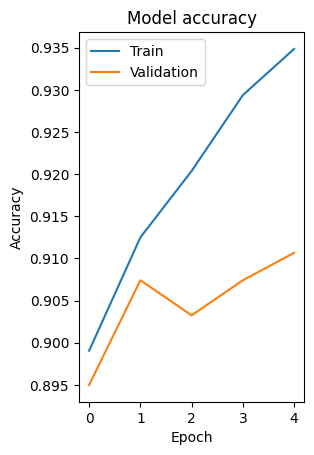

In [ ]:
# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

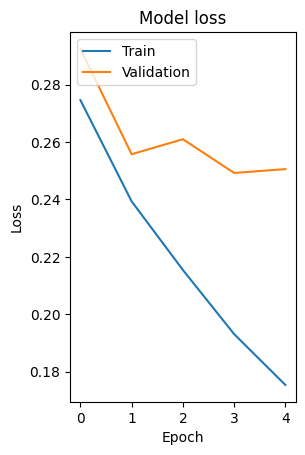

In [ ]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')